In [19]:
import numpy as np
from matplotlib import pyplot as plt # data visualization
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import seaborn as sns # statistical data visualization
%matplotlib inline

In [20]:
# load dataframe
df = pd.read_csv("datasets/stell-faults.csv")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [22]:
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [23]:
# function for converting value for each faults columns to a single column as label
def gets_faults_column(row):
    if row['Pastry'] == 1:
        return 0
    elif row['Z_Scratch'] == 1:
        return 1
    elif row['K_Scatch'] == 1:
        return 2
    elif row['Stains'] == 1:
        return 3
    elif row['Dirtiness'] == 1:
        return 4
    elif row['Bumps'] == 1:
        return 5
    elif row['Other_Faults'] == 1:
        return 6
    
    return 6

In [24]:
# checking null value in every columns
df.isnull().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [25]:
df['Faults'] = df.apply(gets_faults_column, axis=1)

In [26]:
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,-0.2913,0.5822,1,0,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,-0.1756,0.2984,1,0,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,-0.1228,0.2150,1,0,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,-0.1568,0.5212,1,0,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,-0.1992,1.0000,1,0,0,0,0,0,0,0


In [27]:
# checking null value in every columns
df.isnull().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
Faults                   0
dtype: int64

In [28]:
# drop the faults columns because we already replace with the new one
df = df.drop(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'], axis = 1)

df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,0


In [29]:
# get labels
y = df['Faults']
X = df[df.columns.difference(['Faults'])]
# split dataset into train and test dataset with ratio 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

In [30]:
# Random Forest Classifier model with default parameters (n_estimators = 10)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

# Check accuracy score 
print('Model accuracy score with default parameters : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default parameters : 0.7753


In [31]:
# Feature Selection using random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel


# Create a random forest classifier
clf = RandomForestRegressor(n_estimators=100)
X_train
# Train the classifier
clf.fit(X_train, y_train)

RandomForestRegressor()

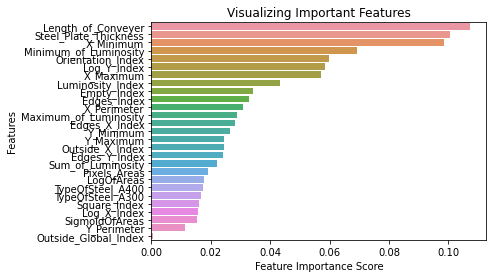

In [32]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
# Visualize the graph
plt.show()
plt.close()

In [33]:
# Build Random Forest model on selected features
y = df['Faults']
# drop the least important feature doors from the model, rebuild the model and check its effect on accuracy.
X = df[df.columns.difference(['Faults', 'Outside_Global_Index'])]
# split dataset into train and test dataset with ratio 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

In [34]:
# instantiate the classifier
clf = RandomForestClassifier(random_state=0)

# fit the model to the training set
clf.fit(X_train, y_train)

# Predict on the test set results
y_pred = clf.predict(X_test)

# Check accuracy score 
print('Model accuracy score with Outside_Global_Index variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with Outside_Global_Index variable removed : 0.7856


In [35]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
# Lets split the data into 10 folds. 
# We will use this 'kf'(StratiFiedKFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [38]:
#There are multiple hyperparameters like n_estimators, max_depth, min_samples_split etc which affect the model performance. 
#Here we are going to do tuning based on 'n_estimators'. 
#We will try with estimators starting from 50 to 350 and depending on the final 'rmse' score choose the value of estimator.
    
estimators = [50, 100, 150, 200, 250, 300, 350]

for count in estimators:
    score = cross_val_score(RandomForestClassifier(n_estimators= count, random_state = 0), X_train, y_train, cv= kf, scoring="accuracy")
    print(f'For estimators: {count}, acc: {score.mean()}')
    

For estimators: 50, acc: 0.7599509803921569
For estimators: 100, acc: 0.7658660130718953
For estimators: 150, acc: 0.7673257080610022
For estimators: 200, acc: 0.769537037037037
For estimators: 250, acc: 0.7710130718954249
For estimators: 300, acc: 0.7746895424836601
For estimators: 350, acc: 0.772483660130719


In [39]:
from sklearn.metrics import classification_report
# now build our random forest model based on our information that we get from feature selection and tuning section.
# removed Outside_Global_Index column
# set n_estimaotrs = 300
# Build Random Forest model on selected features
y = df['Faults']
# drop the least important feature doors from the model, rebuild the model and check its effect on accuracy.
X = df[df.columns.difference(['Faults', 'Outside_Global_Index'])]
# split dataset into train and test dataset with ratio 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

# instantiate the classifier with n_estimators = 200 (one of the estimator that get highest accuracy 
# lesser than the other so its make trainning more efficient in time usage.)
clf = RandomForestClassifier(random_state=0, n_estimators = 300)

# fit the model to the training set
clf.fit(X_train, y_train)

# Predict on the test set results
y_pred = clf.predict(X_test)

# Check accuracy score 
print('Model accuracy score with Outside_Global_Index variable removed & n_estimator = 200: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
# Print Classification Report
print(classification_report(y_test, y_pred))

Model accuracy score with Outside_Global_Index variable removed & n_estimator = 200: 0.7839
              precision    recall  f1-score   support

           0       0.73      0.53      0.61        51
           1       0.94      0.88      0.91        52
           2       0.98      0.93      0.96       130
           3       0.86      0.86      0.86        22
           4       0.75      0.69      0.72        13
           5       0.75      0.69      0.72       125
           6       0.66      0.78      0.72       190

    accuracy                           0.78       583
   macro avg       0.81      0.77      0.79       583
weighted avg       0.79      0.78      0.78       583



In [40]:
# split()  method generate indices to split data into training and test set.
cnt = 1
for train_index, test_index in kf.split(X_train, y_train):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 1222, Test set:136
Fold:2, Train set: 1222, Test set:136
Fold:3, Train set: 1222, Test set:136
Fold:4, Train set: 1222, Test set:136
Fold:5, Train set: 1222, Test set:136
Fold:6, Train set: 1222, Test set:136
Fold:7, Train set: 1222, Test set:136
Fold:8, Train set: 1222, Test set:136
Fold:9, Train set: 1223, Test set:135
Fold:10, Train set: 1223, Test set:135


In [41]:
score = cross_val_score(RandomForestClassifier(random_state = 0, n_estimators = 300), X_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.74264706 0.75735294 0.74264706 0.77941176 0.80882353 0.72058824
 0.73529412 0.78676471 0.74814815 0.80740741]
Average score: 0.76


[[ 27   0   0   0   0   4  20]
 [  0  46   0   0   0   0   6]
 [  0   0 121   2   0   0   7]
 [  0   0   0  19   0   0   3]
 [  0   0   0   0   9   0   4]
 [  3   0   0   0   0  86  36]
 [  7   3   2   1   3  25 149]]


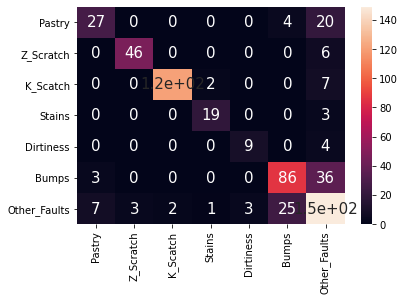

In [42]:
# Print the Confusion Matrix and slice it into four pieces
# Pastry = 0, Z_Scratch = 1, K_Scatch = 2, Stains = 3, Dirtiness = 4, Bumps = 5, Other_Faults = 6
index = ["Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]
columns = ["Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)
df_cm = pd.DataFrame(cm, index, columns)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 15}) # font size
plt.show()
plt.close()